<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Zadachi_klassifikacii_i_klasterizacii/netology_clas_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи классификации и кластеризации

**Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [ ]:
len(y_test)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

Почитать про другие метрики качества в задачах классификации: https://habr.com/ru/company/ods/blog/328372/

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [ ]:
import sklearn

help(sklearn.metrics)

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]

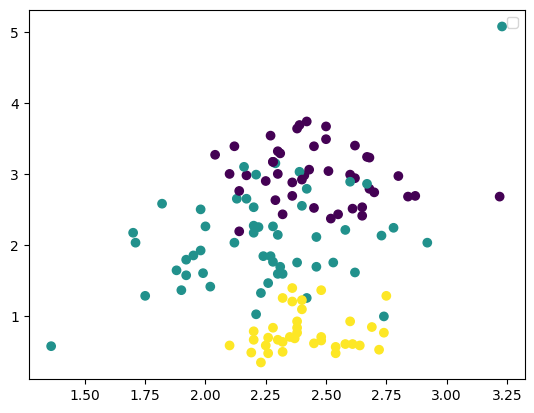

In [ ]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=y_train)
plt.legend()
plt.show()


In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

In [ ]:
y_train

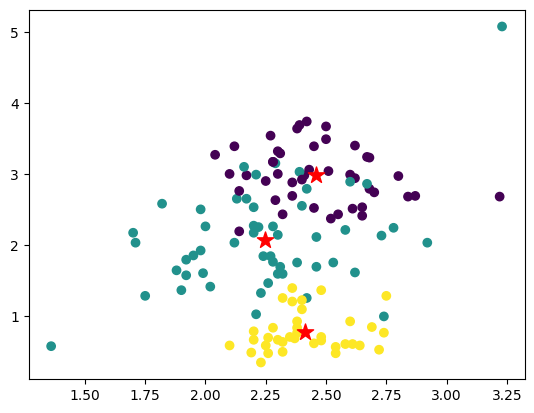

In [ ]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')


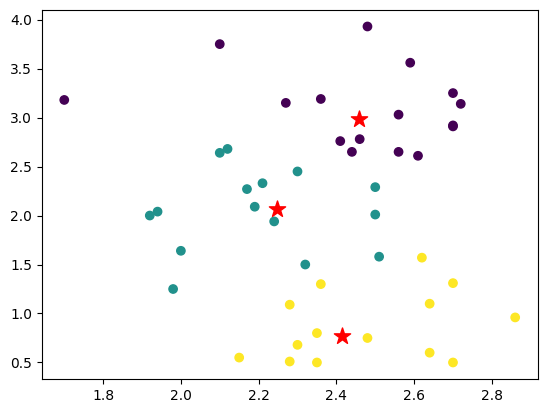

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lda_small.predict(small_test))
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [ ]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [ ]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA:
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[9.73067203e-01, 1.30618394e-02, 1.38709577e-02],
       [9.88784150e-01, 1.42686917e-03, 9.78898124e-03],
       [4.84491458e-02, 2.30996350e-01, 7.20554504e-01],
       [9.96850907e-01, 1.24762390e-03, 1.90146941e-03],
       [6.37663483e-02, 9.07851033e-01, 2.83826184e-02],
       [9.94127474e-01, 3.39607679e-04, 5.53291791e-03],
       [1.40142983e-02, 9.85599014e-01, 3.86687685e-04],
       [5.42638129e-03, 3.17422922e-04, 9.94256196e-01],
       [4.43832047e-02, 9.55353350e-01, 2.63445592e-04],
       [1.54139186e-01, 1.44733104e-02, 8.31387503e-01],
       [4.85179105e-01, 5.12883085e-01, 1.93781048e-03],
       [1.13324555e-04, 2.21974796e-04, 9.99664701e-01],
       [9.92550072e-01, 3.63470078e-03, 3.81522680e-03],
       [6.17146023e-02, 8.01472495e-01, 1.36812903e-01],
       [9.93260767e-01, 1.14165281e-05, 6.72781652e-03],
       [2.88609367e-04, 9.99626376e-01, 8.50151014e-05],
       [1.75622046e-03, 9.97068558e-01, 1.17522175e-03],
       [2.90945963e-03, 9.96773

In [ ]:
res = lr.predict_proba(X_test)
sum(res[0])

1.0

In [ ]:
accuracy_score(y_test, lr.predict(X_test))

0.9777777777777777

## Кластеризация

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/heroes_stats/charcters_stats.csv', index_col='Name')
df

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Name,,,,,,,,
3-D Man,good,50,31,43,32,25,52,233
A-Bomb,good,38,100,17,80,17,64,316
Abe Sapien,good,88,14,35,42,35,85,299
Abin Sur,good,50,90,53,64,84,65,406
Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...
Yellowjacket,good,88,10,12,28,12,14,164
Yellowjacket II,good,50,10,35,28,31,28,182
Ymir,good,50,100,27,100,83,28,388


<Axes: xlabel='Strength', ylabel='Speed'>

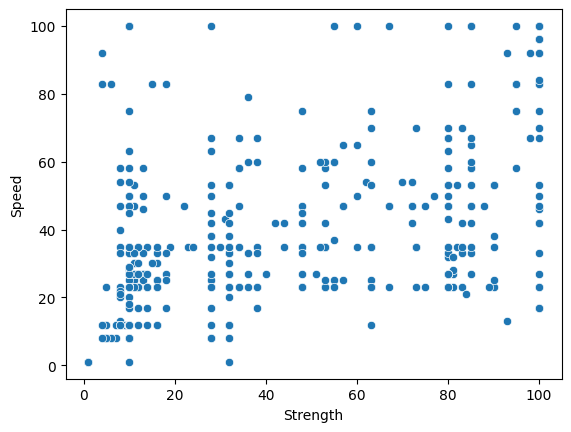

In [ ]:
# попробуем кластеризовать супергероям по силе и скорости
X = df[['Strength', 'Speed']]
sns.scatterplot(x=df['Strength'], y=df['Speed'])

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.0588177 ,  0.60973205],
       [ 2.17640573, -0.40040491],
       [-0.46290688,  0.29892068],
       ...,
       [ 2.17640573, -0.0118907 ],
       [-0.58566561, -0.16729638],
       [-0.58566561,  2.82426308]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-36-2b17fc623a3e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clusters_k3'] = predictions


,Strength,Speed,Clusters_k3
Name,,,
3-D Man,31,43,1
A-Bomb,100,17,2
Abe Sapien,14,35,1
Abin Sur,90,53,2
Abomination,80,53,2
...,...,...,...
Yellowjacket,10,12,0
Yellowjacket II,10,35,1
Ymir,100,27,2


<Axes: >

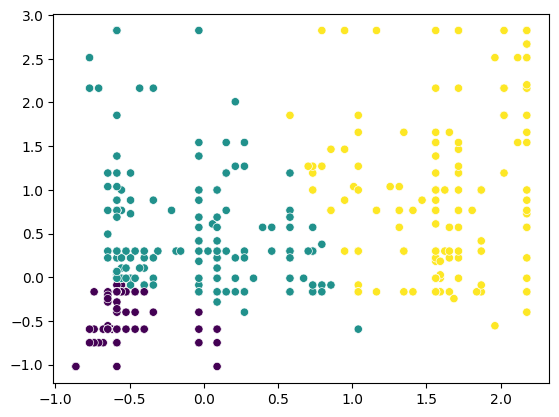

In [ ]:
from sklearn.cluster import KMeans

# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42)

predictions = kmeans.fit_predict(X_scaled)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
X['Clusters_k3'] = predictions
display(X)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], c=predictions)

In [ ]:
# добавляем третий признак — Intelligence, алгоритм такой же
X = df[['Strength', 'Speed', 'Intelligence']]

kmeans = KMeans(n_clusters=3, random_state=42)


predictions = kmeans.fit_predict(X)
predictions = kmeans.labels_
X['Clusters_k3'] = predictions
X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-37-318e55148fc4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clusters_k3'] = predictions


,Strength,Speed,Intelligence,Clusters_k3
Name,,,,
3-D Man,31,43,50,0
A-Bomb,100,17,38,2
Abe Sapien,14,35,88,0
Abin Sur,90,53,50,2
Abomination,80,53,63,2
...,...,...,...,...
Yellowjacket,10,12,88,0
Yellowjacket II,10,35,50,0
Ymir,100,27,50,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

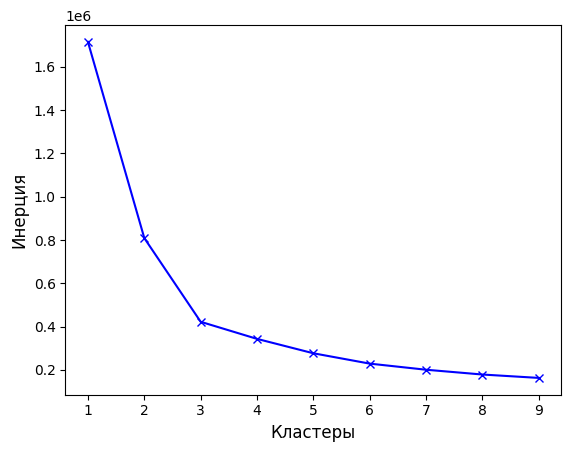

In [ ]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num,  random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

Однако изгиб на графике также может быть представлен нечётко, то могут подойти другие методы, например коэффициент силуэта.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси X отложено количество кластеров, а по оси y — значение коэффициента силуэта.

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='cluster', ylabel='silhouette'>

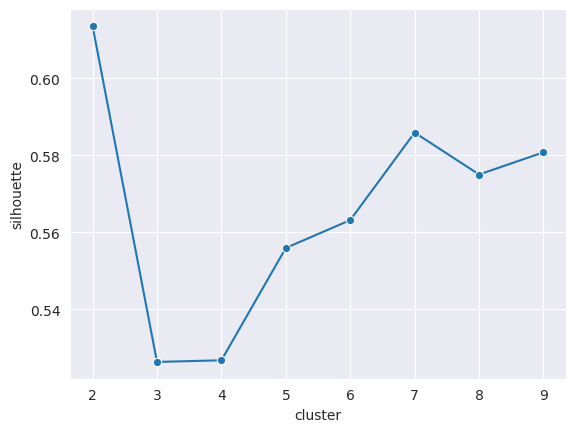

In [ ]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = df[['Strength', 'Speed']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")

# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Иерархическая кластеризация

<ipython-input-40-1740a608a37b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clusters_agg'] = predictions


<Axes: >

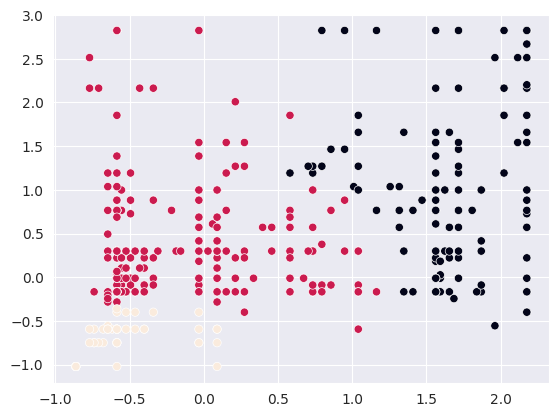

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)

predictions = clustering.fit_predict(X_scaled)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = clustering.labels_

# сохраним предсказания в датафрейм
X['Clusters_agg'] = predictions

# визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам
# sns.scatterplot(x=df['Strength'], y=df['Speed'], c=predictions)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], c=predictions)

In [ ]:
X

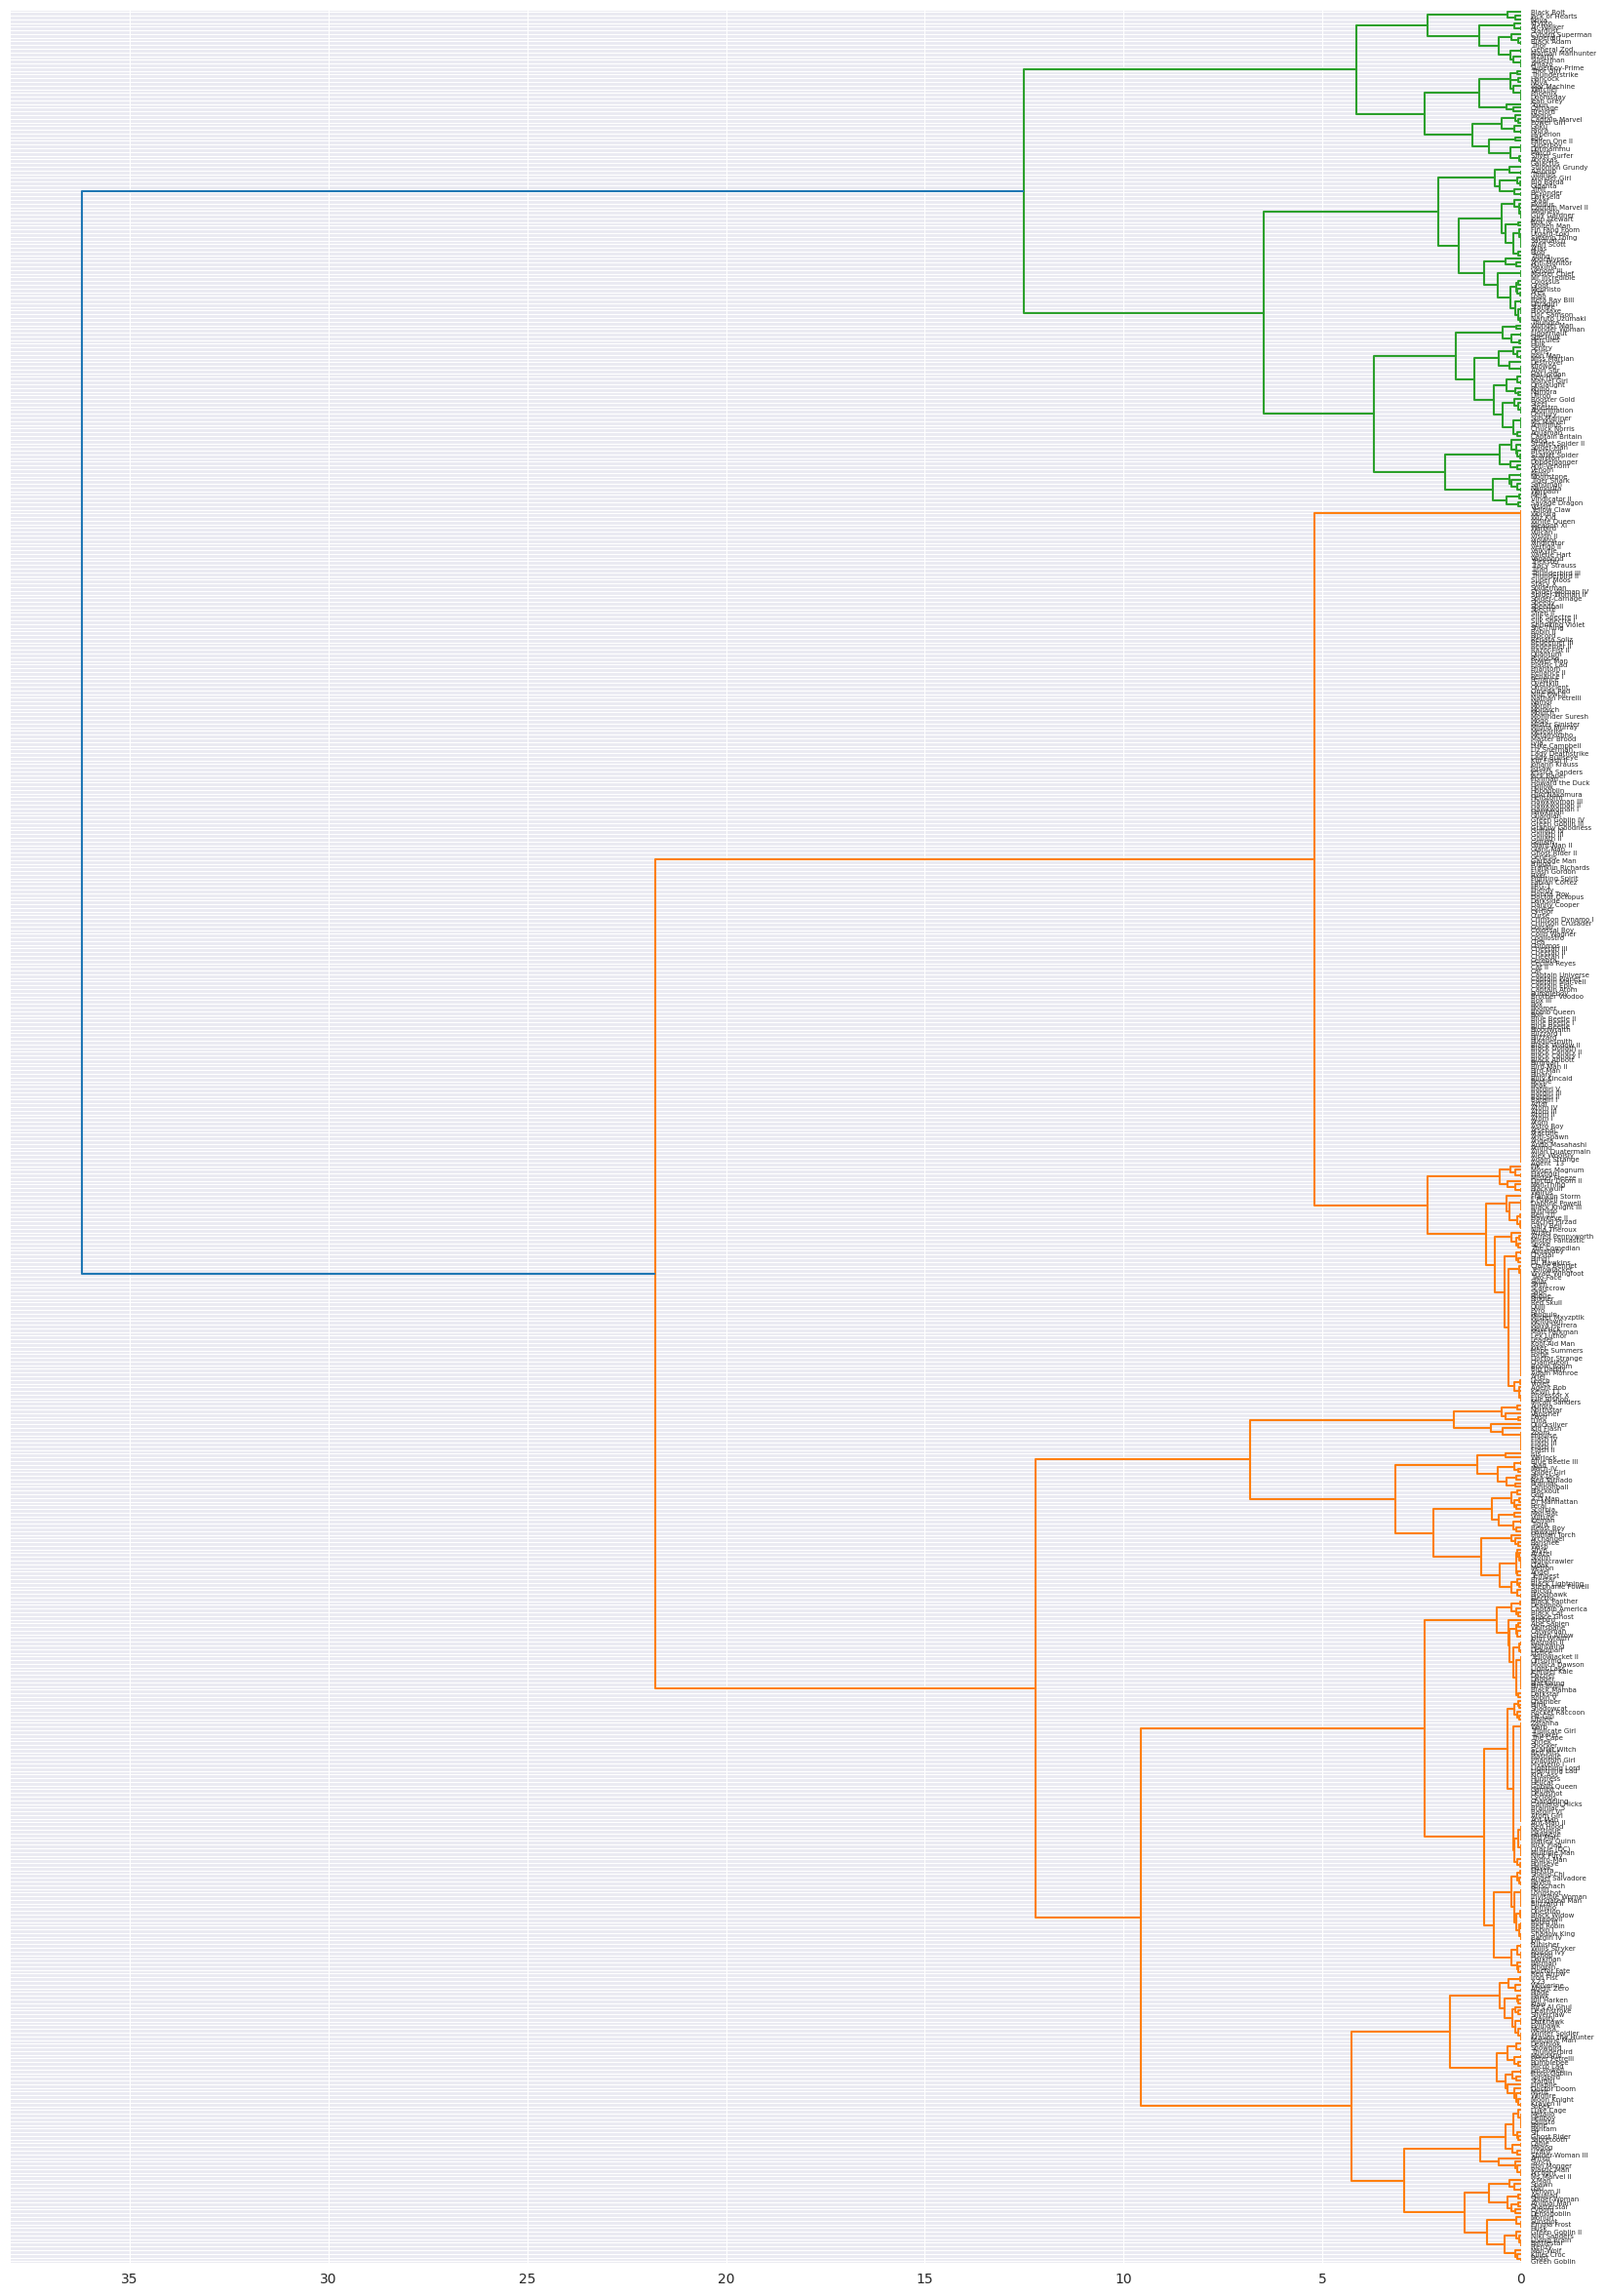

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# рассчитаем расстояния между кластерами
linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(20, 30))

# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='left',
            labels=df.index,
            distance_sort='descending')

plt.show()